# Ryzyko rynkowe
## Importy

In [1]:
#pip install numpy pandas matplotlib yfinance scipy pymannkendall
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
import pymannkendall as mk

## Pobranie danych przez API

Źródło danych Yahoo Finance: https://finance.yahoo.com/chart/NVDA.

Zbiór cen akcji NVIDIA Corporation (NVDA) od początku 2023 roku zawiera kolumny:
- Adj Close: skorygowana cena zamknięcia.
- Close: cena zamknięcia.
- High: najwyższa cena w ciągu dnia.
- Low: najniższa cena w ciągu dnia.
- Open: cena otwarcia.
- Volume: liczba akcji, która zmieniła właściciela tego dnia.

In [ ]:
data = yf.download("NVDA", start="2023-01-01", end="2023-12-31")

In [ ]:
data.to_csv("data/NVDA_data.csv")

## Eksploracyjna analiza danych

In [2]:
data = pd.read_csv("data/NVDA_data.csv", header=[0, 1], index_col=0, parse_dates=True)
print(data.shape)

(250, 6)


In [3]:
print(data.columns)

MultiIndex([('Adj Close', 'NVDA'),
            (    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA')],
           names=['Price', 'Ticker'])


In [4]:
print(data.head())

Price                      Adj Close   Close    High     Low    Open  \
Ticker                          NVDA    NVDA    NVDA    NVDA    NVDA   
Date                                                                   
2023-01-03 00:00:00+00:00  14.305581  14.315  14.996  14.096  14.851   
2023-01-04 00:00:00+00:00  14.739296  14.749  14.853  14.241  14.567   
2023-01-05 00:00:00+00:00  14.255614  14.265  14.564  14.148  14.491   
2023-01-06 00:00:00+00:00  14.849223  14.859  15.010  14.034  14.474   
2023-01-09 00:00:00+00:00  15.617716  15.628  16.056  15.141  15.284   

Price                         Volume  
Ticker                          NVDA  
Date                                  
2023-01-03 00:00:00+00:00  401277000  
2023-01-04 00:00:00+00:00  431324000  
2023-01-05 00:00:00+00:00  389168000  
2023-01-06 00:00:00+00:00  405044000  
2023-01-09 00:00:00+00:00  504231000  


Spłaszczenie oznaczeń kolumn:

In [5]:
data.columns = ["_".join(col).strip() for col in data.columns]
print(data.head())

                           Adj Close_NVDA  Close_NVDA  High_NVDA  Low_NVDA  \
Date                                                                         
2023-01-03 00:00:00+00:00       14.305581      14.315     14.996    14.096   
2023-01-04 00:00:00+00:00       14.739296      14.749     14.853    14.241   
2023-01-05 00:00:00+00:00       14.255614      14.265     14.564    14.148   
2023-01-06 00:00:00+00:00       14.849223      14.859     15.010    14.034   
2023-01-09 00:00:00+00:00       15.617716      15.628     16.056    15.141   

                           Open_NVDA  Volume_NVDA  
Date                                               
2023-01-03 00:00:00+00:00     14.851    401277000  
2023-01-04 00:00:00+00:00     14.567    431324000  
2023-01-05 00:00:00+00:00     14.491    389168000  
2023-01-06 00:00:00+00:00     14.474    405044000  
2023-01-09 00:00:00+00:00     15.284    504231000  


In [6]:
print(data.tail())

                           Adj Close_NVDA  Close_NVDA  High_NVDA   Low_NVDA  \
Date                                                                          
2023-12-22 00:00:00+00:00       48.819527   48.830002  49.382999  48.466999   
2023-12-26 00:00:00+00:00       49.268425   49.278999  49.599998  48.959999   
2023-12-27 00:00:00+00:00       49.406395   49.417000  49.680000  49.084999   
2023-12-28 00:00:00+00:00       49.511375   49.521999  49.883999  49.411999   
2023-12-29 00:00:00+00:00       49.511375   49.521999  49.997002  48.750999   

                           Open_NVDA  Volume_NVDA  
Date                                               
2023-12-22 00:00:00+00:00  49.195000    252507000  
2023-12-26 00:00:00+00:00  48.967999    244200000  
2023-12-27 00:00:00+00:00  49.511002    233648000  
2023-12-28 00:00:00+00:00  49.643002    246587000  
2023-12-29 00:00:00+00:00  49.813000    389293000  


Po wyświetleniu paru pierwszych i ostatnich wierszy widzimy, że brakuje obserwacji z niektórych dni (mamy 250 obserwacji w ciągu całego 2023 roku).

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close_NVDA  250 non-null    float64
 1   Close_NVDA      250 non-null    float64
 2   High_NVDA       250 non-null    float64
 3   Low_NVDA        250 non-null    float64
 4   Open_NVDA       250 non-null    float64
 5   Volume_NVDA     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB
None


Wykres szeregu czasowego cen zamknięcia:

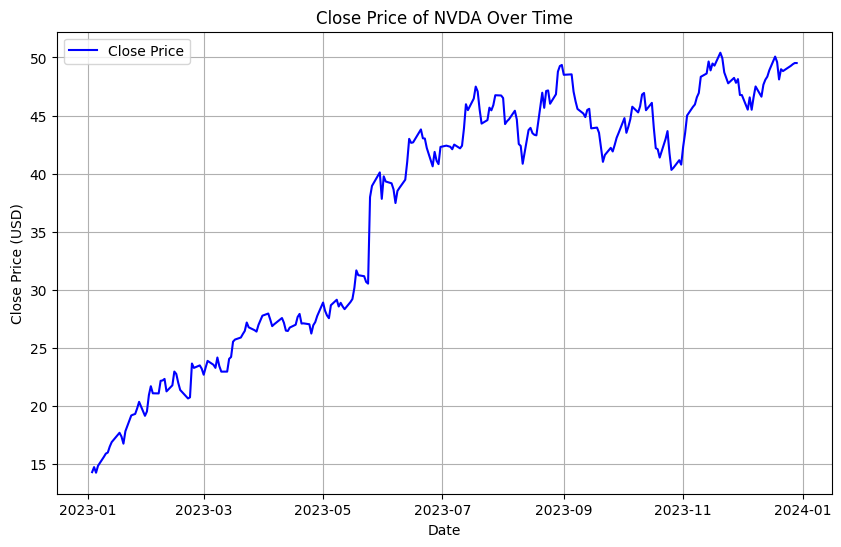

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Close_NVDA"], color='blue', label="Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Close Price of NVDA Over Time")
plt.legend()
plt.grid()
plt.show()

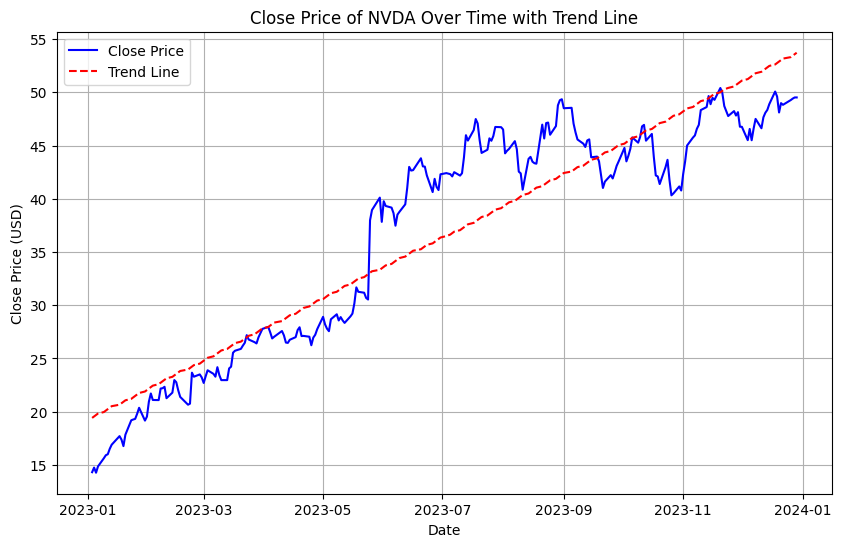

In [9]:
dates = np.arange(len(data))  # Zastępujemy daty liczbami, aby ułatwić obliczenia
close_prices = data["Close_NVDA"]

# Obliczamy współczynniki linii trendu
slope, intercept = np.polyfit(dates, close_prices, 1)

# Obliczamy wartości linii trendu
trend_line = slope * dates + intercept

# Tworzymy wykres z linią trendu
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Close_NVDA"], label="Close Price", color='blue')
plt.plot(data.index, trend_line, label="Trend Line", color='red', linestyle="--")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Close Price of NVDA Over Time with Trend Line")
plt.legend()
plt.grid()
plt.show()

In [10]:
trend_test = mk.original_test(data['Close_NVDA'])

# Wynik testu
print(trend_test.trend) # mamy trend rosnący

increasing


## Prosta stopa zwrotu

In [11]:
# dzienne stopy zwrotu
data['daily_return'] = data['Close_NVDA'].pct_change() * 100 # w procentach

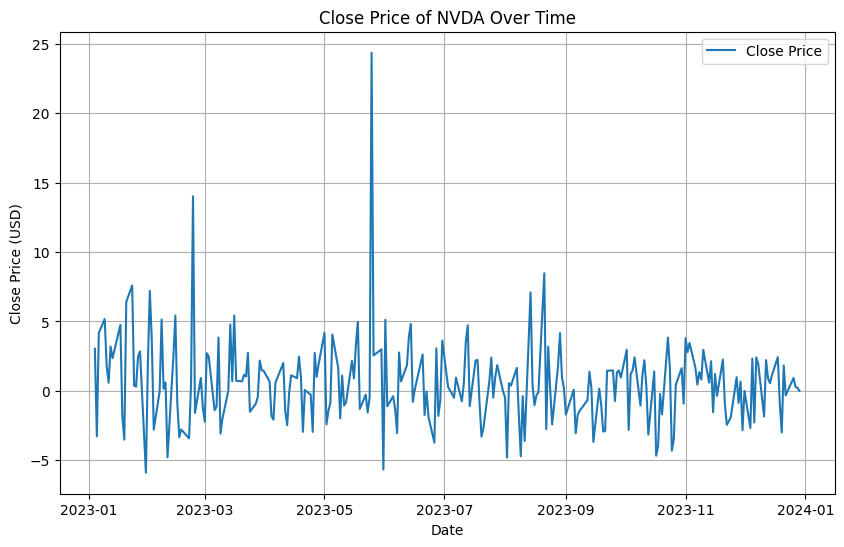

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["daily_return"], label="Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Close Price of NVDA Over Time")
plt.legend()
plt.grid()
plt.show()

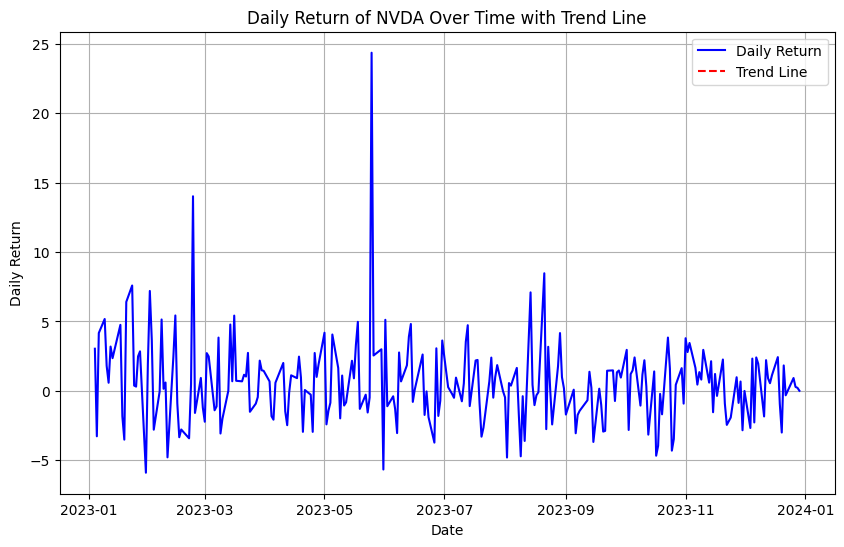

In [13]:
dates = np.arange(len(data))
daily_returns = data["daily_return"]

# Obliczamy współczynniki linii trendu
slope, intercept = np.polyfit(dates, daily_returns, 1)

# Obliczamy wartości linii trendu
trend_line = slope * dates + intercept

# Tworzymy wykres stóp zwrotu z linią trendu
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["daily_return"], label="Daily Return", color='blue')
plt.plot(data.index, trend_line, label="Trend Line", color='red', linestyle="--")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Daily Return of NVDA Over Time with Trend Line")
plt.legend()
plt.grid()
plt.show()

# nie ma trendu

In [14]:
trend_test = mk.original_test(data['daily_return'])

# Wynik testu
print(trend_test.trend)

no trend


In [15]:
data.index.to_series().diff().value_counts()
# luki w datach to dni, w których rynki były zamknięte (np. weekendy, święta)
# różnice w datach nie przeszkadzają w policzeniu VaR

Date
1 days    196
3 days     44
4 days      7
2 days      2
Name: count, dtype: int64

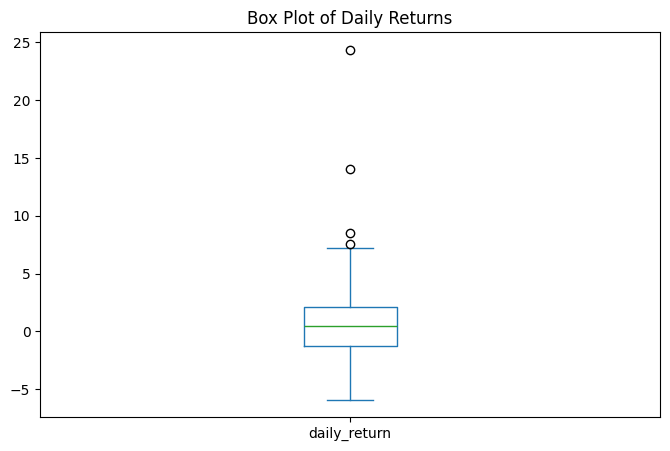

In [16]:
# wartości odstające
plt.figure(figsize=(8, 5))
data['daily_return'].plot(kind='box')
plt.title("Box Plot of Daily Returns")
plt.show()

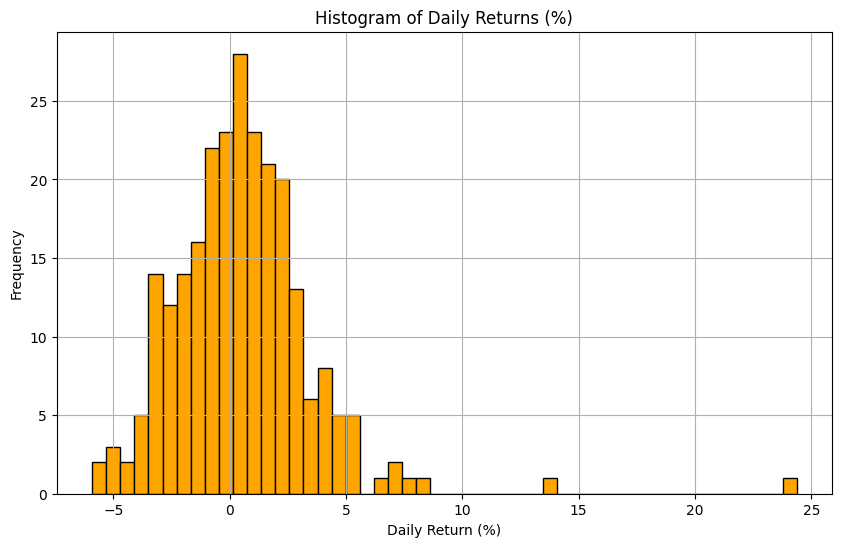

In [17]:
# analiza rozkładu - histogram
plt.figure(figsize=(10, 6))
data['daily_return'].hist(bins=50, edgecolor='k', color='orange')
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.title("Histogram of Daily Returns (%)")
plt.show()

In [18]:
# wnioski...
# gruby ogon z prawej strony
# Jeśli używasz dziennych stóp zwrotu, mogą one nie być rozkładem normalnym, ponieważ dane finansowe często mają "grube ogony"
# i lepiej mogą pasować do rozkładów typu t-Studenta.

- Wartości dodatnie oznaczają wzrost stopy zwrotu, czyli zysk.
- Wartości ujemne to spadek stopy zwrotu, czyli strata.
- Jeśli stopa zwrotu wynosi zero, oznacza to brak zmiany ceny.

## Kalkulacja VaR
### a) Obliczanie VaR przy założeniu rozkładu normalnego

In [19]:
mu = data['daily_return'].mean()
sigma = data['daily_return'].std()

In [20]:
alpha_95 = 0.05
alpha_99 = 0.01

In [21]:
# VaR_95 = norm.ppf(1 - alpha_95, mu, sigma)
# VaR_99 = norm.ppf(1 - alpha_99, mu, sigma)
VaR_95_param = mu + sigma * np.percentile(np.random.normal(0, 1, 100000), 5)  # Parametryczny VaR dla 95%
VaR_99_param = mu + sigma * np.percentile(np.random.normal(0, 1, 100000), 1)  # Parametryczny VaR dla 99%

In [22]:
print(f"VaR 95% (Normalny rozkład): {VaR_95_param}")
print(f"VaR 99% (Normalny rozkład): {VaR_99_param}")

VaR 95% (Normalny rozkład): -4.478133711081221
VaR 99% (Normalny rozkład): -6.503631984356986


### b) Obliczanie VaR dla rozkładu historycznego

In [23]:
# sortowanie stóp zwrotu
sorted_returns = data['daily_return'].sort_values()

In [24]:
VaR_hist_95 = sorted_returns.quantile(alpha_95)
VaR_hist_99 = sorted_returns.quantile(alpha_99)

In [25]:
print(f"VaR 95% (Rozkład historyczny): {VaR_hist_95}")
print(f"VaR 99% (Rozkład historyczny): {VaR_hist_99}")

VaR 95% (Rozkład historyczny): -3.4575547982093324
VaR 99% (Rozkład historyczny): -4.805954710134186


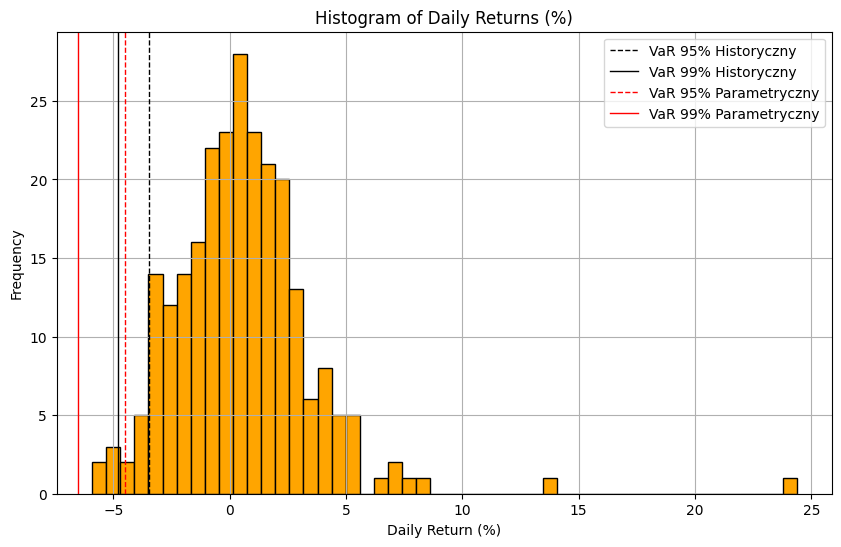

In [26]:
plt.figure(figsize=(10, 6))
data['daily_return'].hist(bins=50, edgecolor='k', color='orange')
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.title("Histogram of Daily Returns (%)")

# Dodanie linii VaR dla podejścia historycznego
plt.axvline(VaR_hist_95, color='black', linestyle='--', linewidth=1, label='VaR 95% Historyczny')
plt.axvline(VaR_hist_99, color='black', linestyle='-', linewidth=1, label='VaR 99% Historyczny')

# Dodanie linii VaR dla podejścia parametrycznego
plt.axvline(VaR_95_param, color='red', linestyle='--', linewidth=1, label='VaR 95% Parametryczny')
plt.axvline(VaR_99_param, color='red', linestyle='-', linewidth=1, label='VaR 99% Parametryczny')

plt.legend()
plt.show()

In [ ]:
# wnioski...

## Podsumowanie wyników

---

In [ ]:
# Analiza danych – sprawdzenie zakresu i jakości danych (częstotliwość, wartości odstające, rozkład).
# Kalkulacja VaR – przy założeniu normalnego rozkładu (trzeba dopasować mu i sigma) oraz dla rozkładu historycznego z danych.
# Krótkie podsumowanie wyników – word, powerpoint lub dobrze skomentowany i opisany kod programistyczny.


# stopa zwrotu
# zysk lub starta

# dane do zyskow i strat, mamy powiedziec co chcemy liczyc, cos tam z var, test na rozklad normalny, komentarzy duzo co widzimy na wykresach

In [ ]:
# Logarytmiczna stopa zwrotu jest preferowana przy analizach ryzyka, np. przy obliczaniu Value at Risk (VaR), ponieważ zapewnia addytywność.
# Przy dużych zyskach/stratach różnica między stopą prostą a logarytmiczną może być znacząca.